## X-Ray Diagnostics Classification
- Normal/Healthy: 0
- PNeumonia: 1
- COVID-19: 2

### Imports

In [3]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
sns.set_style('darkgrid')

import os
import random
import keras

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from keras.utils import load_img
from keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
import tensorflow as tf

from glob import glob
from PIL import Image
import cv2


### 🗒️Load DataSet

In [3]:
c = 'Dataset/COVID-19_Radiography_Dataset_Full/COVID/images'
n = 'Dataset/COVID-19_Radiography_Dataset_Full/Normal/images'
p = 'Dataset/COVID-19_Radiography_Dataset_Full/Viral Pneumonia/images'

In [114]:
Diagnostics = ['Normal', 'Viral Pneumonia', 'COVID-19']

In [4]:
random.seed(42)
filenames = os.listdir(c) + random.sample(os.listdir(n), 2500) + os.listdir(p)

In [5]:
categories = []
for filename in filenames:
    category = filename.split('-')[0]
    if category == 'COVID':
        categories.append(str(2))
    elif category == 'Viral Pneumonia':
        categories.append(str(1))
    else:
        categories.append(str(0))

In [6]:
for i in range(len(filenames)):
    if 'COVID' in filenames[i]:
        filenames[i] = os.path.join(c, filenames[i])
    elif 'Viral Pneumonia' in filenames[i]:
        filenames[i] = os.path.join(p, filenames[i])
    else:
        filenames[i] = os.path.join(n, filenames[i])
    
    
data = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [7]:
data.head()

,filename,category
0,Dataset/COVID-19_Radiography_Dataset_Full/COVI...,2
1,Dataset/COVID-19_Radiography_Dataset_Full/COVI...,2
2,Dataset/COVID-19_Radiography_Dataset_Full/COVI...,2
3,Dataset/COVID-19_Radiography_Dataset_Full/COVI...,2
4,Dataset/COVID-19_Radiography_Dataset_Full/COVI...,2


### 📶Exploratory Data Analysis

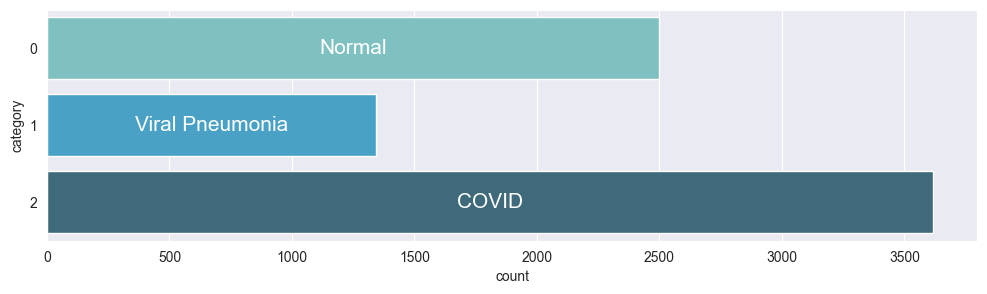

In [112]:
plt.figure(figsize=(12,3))
splot = sns.countplot(data = data.sort_values(by='category'), y ='category', palette='GnBu_d', saturation=0.9)
plt.bar_label(container=splot.containers[0], 
              labels=['Normal', 'Viral Pneumonia', 'COVID'], 
              label_type='center', size=15, color='w')
plt.show()

In [44]:
## Manually => from_flow_Dataframe
#data['image'] = data['filename'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))

In [46]:
## To Save DataFrame into Json
#pd.DataFrame.to_json(data)

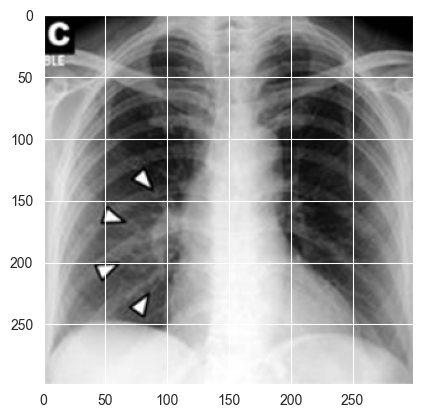

In [11]:
sample = random.choice(data['filename'])
image = load_img(sample)
plt.imshow(image)
plt.show()

#### Image Analysis

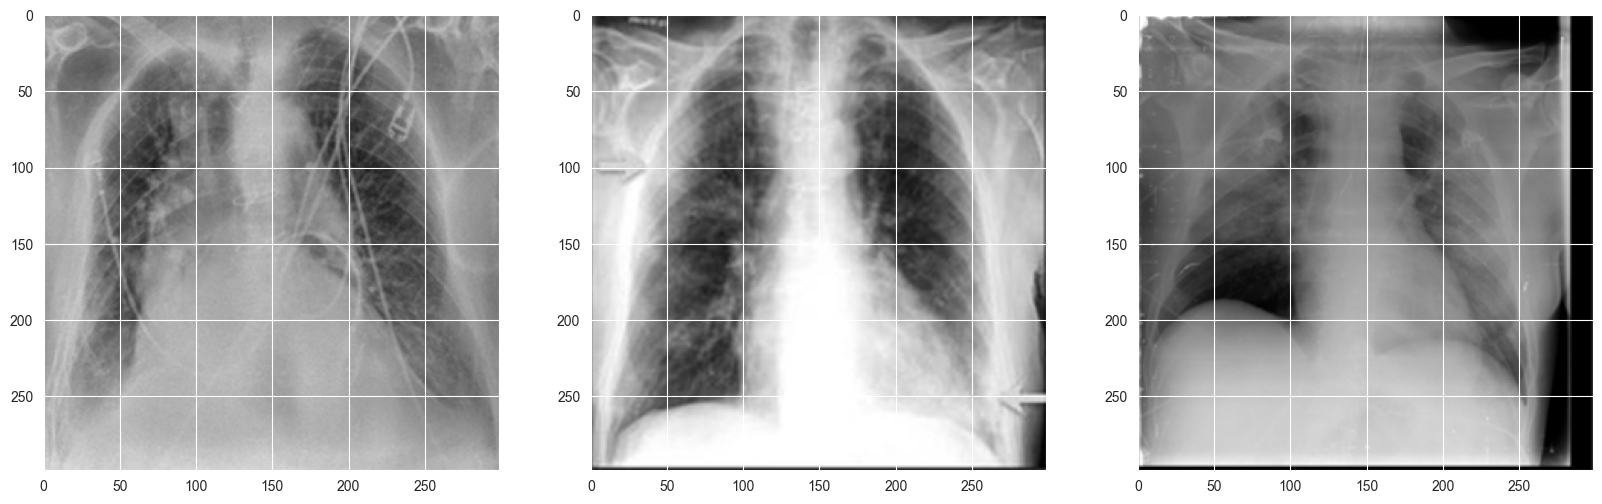

In [13]:
multipleImages = glob('Dataset/COVID-19_Radiography_Dataset_Full/COVID/images/**')
def plotThreeimages(images):
    r = random.sample(images,3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2]))

plotThreeimages(multipleImages)

In [1]:
def deep_analysis(image_path):

    image = cv2.imread(image_path)

    # create figure
    fig = plt.figure(figsize=(15, 9))

    # setting values to rows and column variables
    rows = 2
    columns = 3

    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)
    plt.title('Original ', fontsize = 14)

    plt.imshow(image)
    plt.axis('off')


    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)

    # showing image
    plt.title('B channel', fontsize = 14)
    plt.imshow(image[ : , : , 0])
    plt.axis('off');


    # Adds a subplot at the 3rd position
    fig.add_subplot(rows, columns, 3)

    img = cv2.imread(image_path)
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
    plt.title("Ben Graham's Method", fontsize = 14)
    plt.imshow(img)
    plt.axis('off')
    
    list_text = image_path.split("/")

    print("\n-----------------------------{}-----------------------------\n".format("IMAGE DETAILS" + " ( " + list_text[3].upper() + " )"))
    print('Image Shape: {}'.format(image.shape))
    print('Image Height: {}'.format(image.shape[0]))
    print('Image Width: {}'.format(image.shape[1]))
    print('Image Dimension: {}'.format(image.ndim))
    print('Image Size: {}kb'.format(image.size//1024))
    print('Image Data Type: {}'.format(image.dtype))
    print('Maximum RGB value of the image: {}'.format(image.max()))
    print('Minimum RGB value of the image: {}'.format(image.min()))

### Normal Image


-----------------------------IMAGE DETAILS ( IMAGES\NORMAL-1648.PNG )-----------------------------

Image Shape: (299, 299, 3)
Image Height: 299
Image Width: 299
Image Dimension: 3
Image Size: 261kb
Image Data Type: uint8
Maximum RGB value of the image: 246
Minimum RGB value of the image: 0


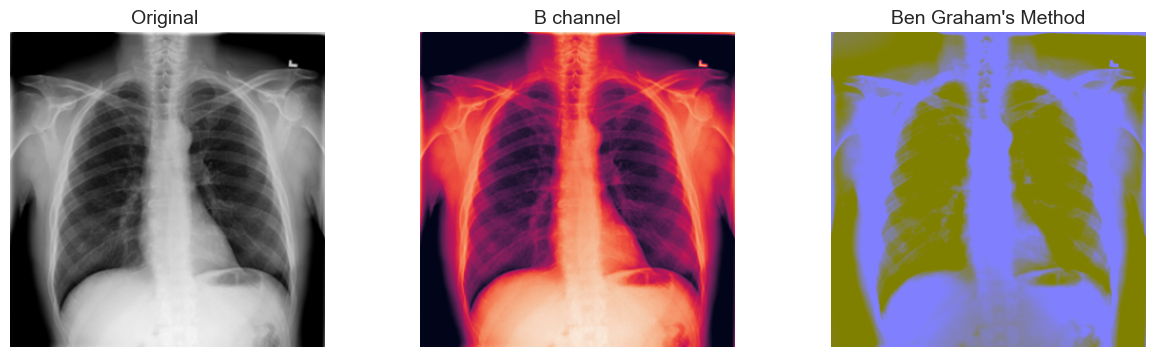

In [4]:
multipleImages = glob('Dataset/COVID-19_Radiography_Dataset_Full/Normal/images/**')
r = random.sample(multipleImages,10)
deep_analysis(r[5])


-----------------------------IMAGE DETAILS ( IMAGES\COVID-2041.PNG )-----------------------------

Image Shape: (299, 299, 3)
Image Height: 299
Image Width: 299
Image Dimension: 3
Image Size: 261kb
Image Data Type: uint8
Maximum RGB value of the image: 255
Minimum RGB value of the image: 0


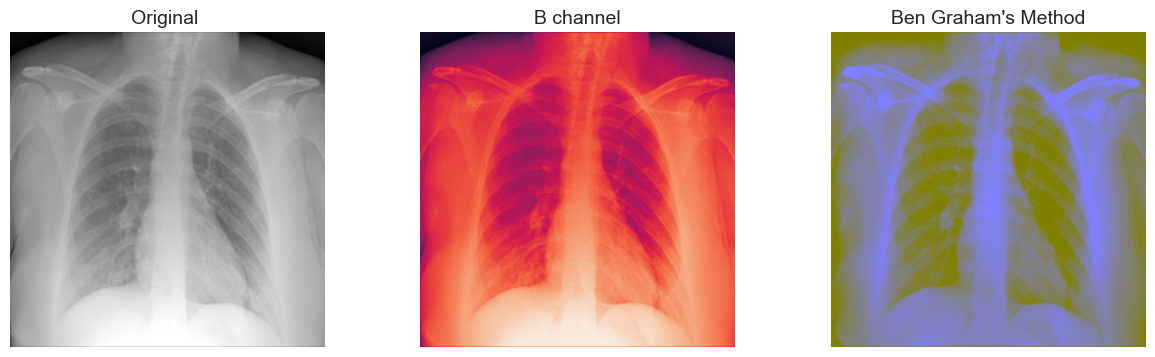

In [6]:
multipleImages = glob('Dataset/COVID-19_Radiography_Dataset_Full/COVID/images/**')
r = random.sample(multipleImages,10)
deep_analysis(r[5])


-----------------------------IMAGE DETAILS ( IMAGES\VIRAL PNEUMONIA-628.PNG )-----------------------------

Image Shape: (299, 299, 3)
Image Height: 299
Image Width: 299
Image Dimension: 3
Image Size: 261kb
Image Data Type: uint8
Maximum RGB value of the image: 255
Minimum RGB value of the image: 0


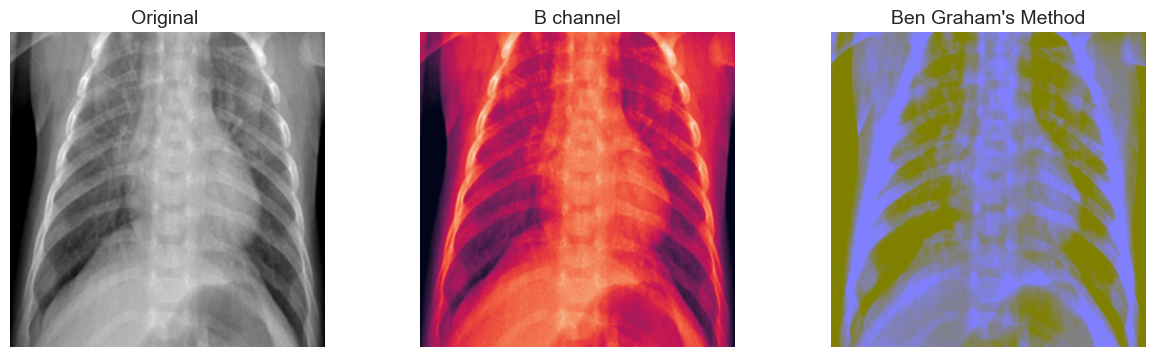

In [7]:
multipleImages = glob('Dataset/COVID-19_Radiography_Dataset_Full/Viral Pneumonia/images/**')
r = random.sample(multipleImages,10)
deep_analysis(r[5])

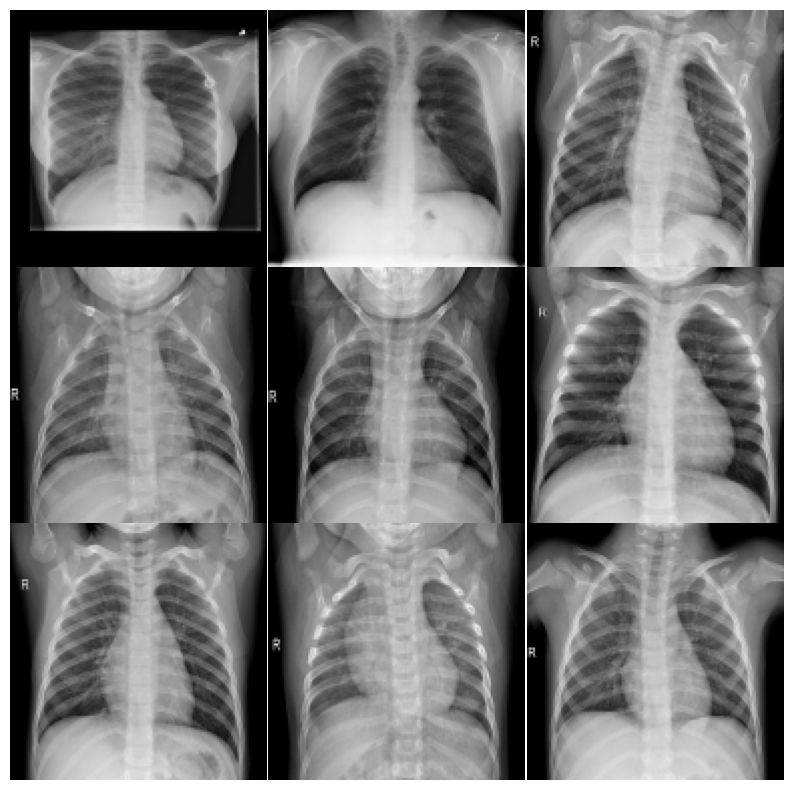

In [9]:
NormalImages = glob('Dataset/COVID-19_Radiography_Dataset_Full/Normal/images/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10,10)
plt.subplots_adjust(wspace=0, hspace=0)
for l in NormalImages[:9]:
        im = cv2.imread(l)
        im = cv2.resize(im, (128,128))
        plt.subplot(3,3,i_+1)
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB));plt.axis('off')
        i_ += 1

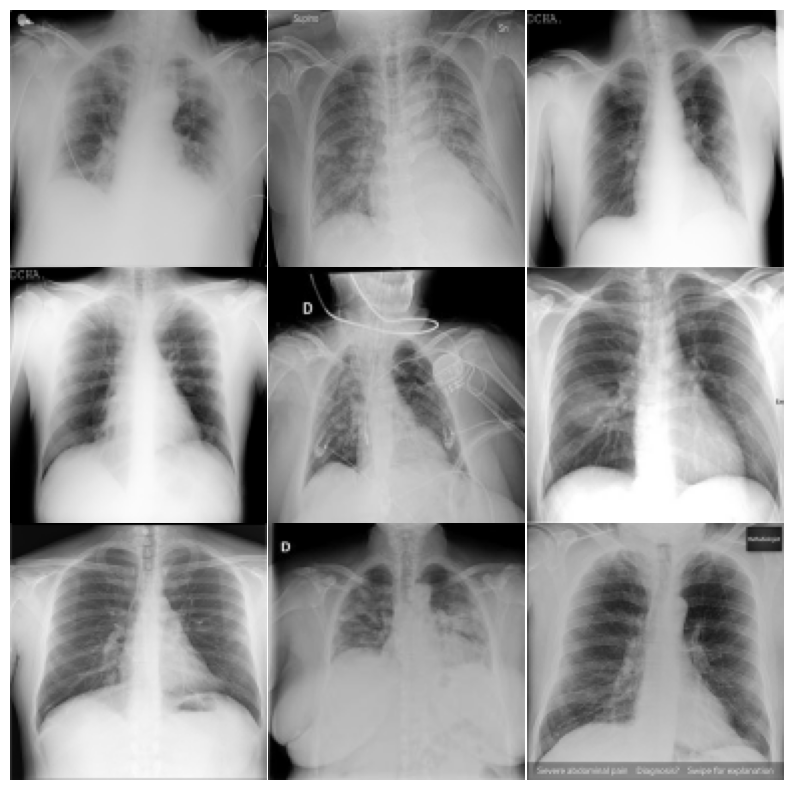

In [20]:
COVIDImages = glob('Dataset/COVID-19_Radiography_Dataset_Full/COVID/images/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10,10)
plt.subplots_adjust(wspace=0, hspace=0)
for l in COVIDImages[:9]:
        im = cv2.imread(l)
        im = cv2.resize(im, (128,128))
        plt.subplot(3,3,i_+1)
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB));plt.axis('off')
        i_ += 1

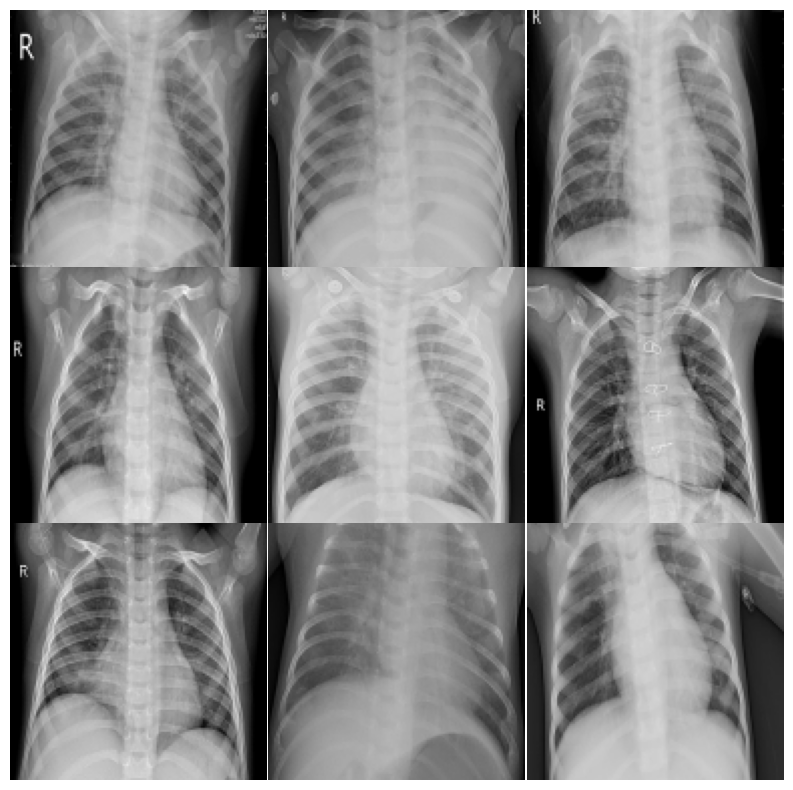

In [21]:
PneumoniaImages = glob('Dataset/COVID-19_Radiography_Dataset_Full/Viral Pneumonia/images/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10,10)
plt.subplots_adjust(wspace=0, hspace=0)
for l in PneumoniaImages[:9]:
        im = cv2.imread(l)
        im = cv2.resize(im, (128,128))
        plt.subplot(3,3,i_+1)
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB));plt.axis('off')
        i_ += 1

#### Splitting Train, Validation & Test Data

In [24]:
train_data, test_valid_data = train_test_split(data, test_size=0.2, random_state = 42, shuffle=True, stratify=data['category'])
train_data = train_data.reset_index(drop=True)
test_valid_data = test_valid_data.reset_index(drop=True)

In [25]:
test_data, valid_data = train_test_split(test_valid_data, test_size=0.5, random_state = 42,
                                         shuffle=True, stratify=test_valid_data['category'])
test_data = test_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

#### Data Augmentation

In [26]:
train_data_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [27]:
train_generator = train_data_gen.flow_from_dataframe(
    train_data, 
    x_col='filename',
    y_col='category',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32
)

Found 5968 validated image filenames belonging to 3 classes.


In [43]:
valid_data_gen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_data_gen.flow_from_dataframe(
    valid_data, 
    x_col='filename',
    y_col='category',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32
)

Found 747 validated image filenames belonging to 3 classes.


#### Model Training - Xception

In [44]:
engine = tf.keras.applications.Xception(
        # Freezing the weights of the top layer in the InceptionResNetV2 pre-traiined model
        include_top = False,

        # Use Imagenet weights
        weights = 'imagenet',

        # Define input shape to 224x224x3
        input_shape = (224 , 224 , 3),

    )
    
x = tf.keras.layers.GlobalAveragePooling2D(name = 'avg_pool')(engine.output)
x = tf.keras.layers.Dropout(0.75)(x)
x = tf.keras.layers.BatchNormalization(
                      axis=-1,
                      momentum=0.99,
                      epsilon=0.01,
                      center=True,
                      scale=True,
                      beta_initializer="zeros",
                      gamma_initializer="ones",
                      moving_mean_initializer="zeros",
                      moving_variance_initializer="ones",
                  )(x)
out = tf.keras.layers.Dense(3, activation = 'softmax', name = 'dense_output')(x)


    # Build the Keras model
model = tf.keras.models.Model(inputs = engine.input, outputs = out)
    # Compile the model

model.compile(
        # Set optimizer to Adam(0.0001)
        optimizer = tf.keras.optimizers.Adam(learning_rate= 3e-4),
        # Set loss 
        loss = 'categorical_crossentropy',
        # Set metrics to accuracy
        metrics = ['accuracy']
    )

#### Model Summary

In [45]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

#### Callbacks

In [46]:
# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Learning Rate Reduction
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                            patience=2,
                                                            verbose=2,
                                                            factor=0.5,
                                                            min_lr=0.00001)
reduce_lr =  keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=3, min_lr=0.00001)

# Fit Logs
log_dir = 'logs/fit'+datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
# TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, 
                                                      histogram_freq=1)

# CheckPoint
tl_checkpoint_1 = ModelCheckpoint(filepath='Model/tl_model_v3.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

In [61]:
history = model.fit(train_generator,validation_data=valid_generator, 
                    verbose=1, epochs=10,
                    callbacks=[early_stopping, reduce_lr , learning_rate_reduction, tl_checkpoint_1, tensorboard_callback]
                        )

Epoch 1/10


### Save the Model

In [ ]:
from tensorflow.keras.models import save_model
save_model(model, 'TL_Xception_XRay_Model.h5')

In [47]:
test_set = valid_data_gen.flow_from_dataframe(
    test_data, 
    x_col='filename',
    y_col='category',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 746 validated image filenames belonging to 3 classes.


### Load Model

In [48]:
model = keras.models.load_model('Models/TL_Xception_XRay_Model.h5')

### Evaluating Model

In [49]:
loss,accuracy = model.evaluate(test_set)

24/24 [==============================] - 68s 3s/step - loss: 0.0393 - accuracy: 0.9906


In [117]:
print('Test Loss',loss)
print('Test Accuracy',accuracy)

Test Loss 0.03929736465215683
Test Accuracy 0.9906166195869446


### 📉Predictions

In [62]:
def ProccessImag(img_list):
    img_list = list(img_list) 
    p_list = []
    for item in img_list:  
        # ReSize
        item = cv2.resize(item,dsize=(224,224), interpolation=cv2.INTER_CUBIC)
        #item = skimage.transform.resize(item, (70, 70, 3), mode='constant',anti_aliasing=True)
        # ReScale Values
        item = item / 255
        p_list.append(item)
    return p_list 

In [85]:
multipleImages = glob('Dataset/Validation//**')
randomImages = random.sample(multipleImages,11)
listImage = []
for item in randomImages:
    listImage.append(cv2.imread(item))
procc_listImage = ProccessImag(listImage)
procc_listImage = np.array(procc_listImage)
procc_listImage.shape

(11, 224, 224, 3)

In [113]:
prediction = model.predict(procc_listImage)

1/1 [==============================] - 1s 887ms/step


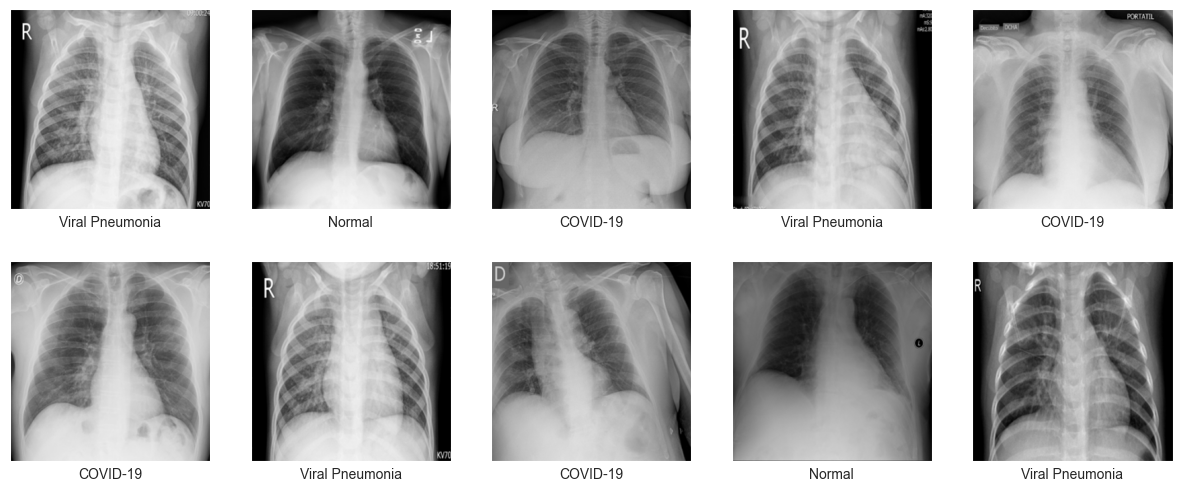

In [116]:
# Multiplot with predicted labels
plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(listImage[i], cmap=plt.cm.binary)
    plt.xlabel(Diagnostics[np.argmax(prediction[i])])
    
plt.show()